In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("./Data/corona_tested_individuals_ver_00139.csv")

/home/noman/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
data['corona_result'].unique()

array(['שלילי', 'אחר', 'חיובי'], dtype=object)

In [4]:
data['corona_result'] = data['corona_result'].replace({"שלילי":"N","חיובי":"Positive","אחר":"Other"})
data['gender'] = data['gender'].replace({"זכר":"Male","נקבה":"Female"})

In [5]:
data

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2021-04-25,0,0,0,0,0,Negative,NaN,NaN,Other
1,2021-04-25,0,0,0,0,0,Negative,NaN,NaN,Other
2,2021-04-25,0,0,0,0,0,Negative,NaN,NaN,Other
3,2021-04-25,0,0,0,0,0,Negative,NaN,NaN,Other
4,2021-04-25,0,0,0,0,0,Negative,NaN,NaN,Other
...,...,...,...,...,...,...,...,...,...,...
5589395,2020-03-11,1,0,0,0,0,Negative,NaN,Male,Abroad
5589396,2020-03-11,1,1,0,0,0,Negative,NaN,Female,Abroad
5589397,2020-03-11,0,1,0,0,0,Negative,NaN,Male,Contact with confirmed
5589398,2020-03-11,0,0,0,0,0,Negative,NaN,Female,Other


In [6]:
data.isna().sum()

test_date                   0
cough                       0
fever                       0
sore_throat                 0
shortness_of_breath         0
head_ache                   0
corona_result               0
age_60_and_above       870628
gender                 128306
test_indication             0
dtype: int64

In [7]:
data.value_counts('corona_result')

corona_result
Negative    5056440
Positive     427222
Other        105738
dtype: int64

/home/noman/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cough', ylabel='corona_result'>

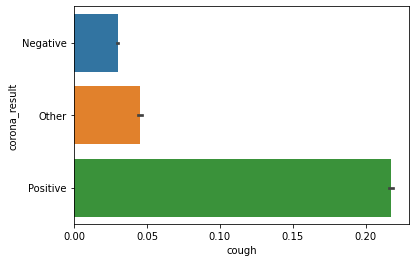

In [8]:
sns.barplot(data['cough'],data['corona_result'])


#### We have a large number of Positive cases in the samples

In [9]:
group = data.groupby(['corona_result'])

<AxesSubplot:xlabel='corona_result'>

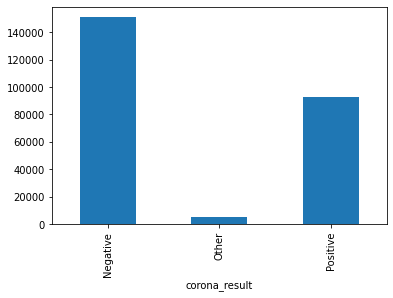

In [10]:
group['cough'].sum().plot.bar()

<AxesSubplot:xlabel='corona_result'>

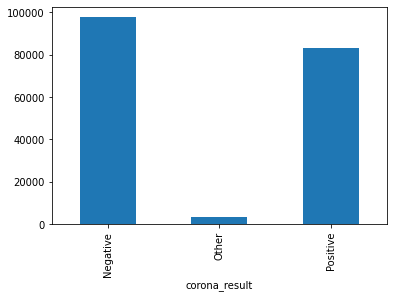

In [11]:
group['fever'].sum().plot.bar()

<AxesSubplot:xlabel='corona_result'>

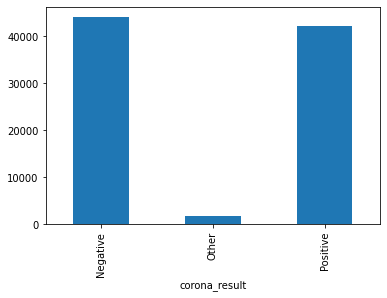

In [12]:
group['sore_throat'].sum().plot.bar()

<AxesSubplot:xlabel='corona_result'>

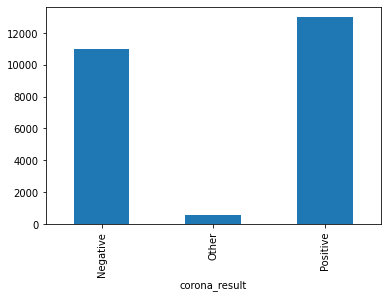

In [13]:
group['shortness_of_breath'].sum().plot.bar()

<AxesSubplot:xlabel='corona_result'>

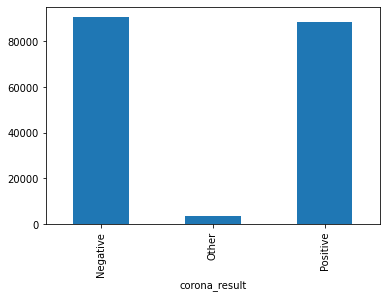

In [14]:
group['head_ache'].sum().plot.bar()

### It seems that headache and shortness of breath are major symptoms leading to Positive covid result.

<AxesSubplot:xlabel='corona_result'>

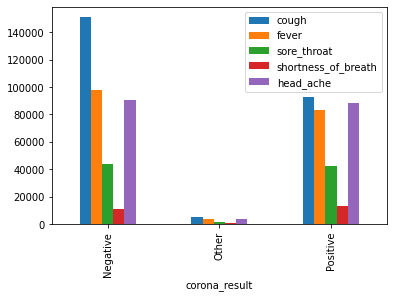

In [15]:
data.groupby('corona_result').sum().plot.bar()

#### A huge number of citizens with only cough were not covid postive

### Now we'll check simaultaneus symptom counts 

In [16]:
data['symptom count'] = data['cough']+data['fever']+data['sore_throat']+data['shortness_of_breath']+data['head_ache']

In [17]:
data.groupby(['symptom count','corona_result']).size()

symptom count  corona_result
0              Negative         4800859
               Other              96677
               Positive          234533
1              Negative          151064
               Other               5348
               Positive          101991
2              Negative           76807
               Other               2650
               Positive           62165
3              Negative           21438
               Other                816
               Positive           21917
4              Negative            5444
               Other                214
               Positive            5723
5              Negative             828
               Other                 33
               Positive             893
dtype: int64

<AxesSubplot:xlabel='symptom count,corona_result'>

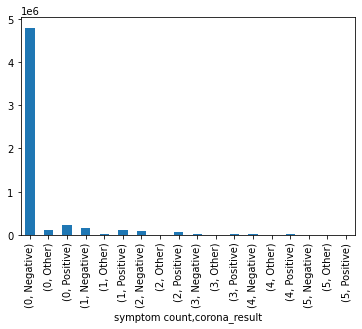

In [18]:
data.groupby(['symptom count','corona_result']).size().plot.bar()

### Very Interesting result as Majority of covid positive people didn't show any symptom, and only 893 people had covid positive and had all 5 symptoms

### Lets see spread of Covid aggregated on months

In [19]:
data['test_date'] = pd.to_datetime(data['test_date'],format="%Y-%m-%d")
data = data.set_index('test_date')

<AxesSubplot:xlabel='test_date'>

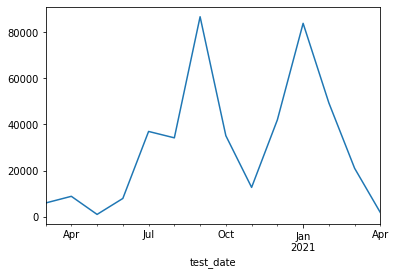

In [20]:
group = data[data['corona_result']=="Positive"].groupby(pd.Grouper(freq="M"))
group.count()['corona_result'].plot()

<AxesSubplot:xlabel='test_date'>

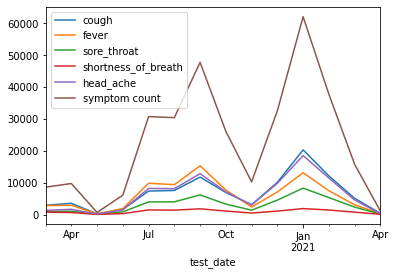

In [21]:
data[data['corona_result']=="Positive"].groupby(pd.Grouper(freq="M")).sum().plot()

In [26]:
monthlydata = data.groupby(pd.Grouper(freq="M")).sum()
monthlydata.to_csv("MonthlyData.csv")

#### It is evident that with increase or decrease in number of positive covid cases, symptoms also followed the same trend, headache and fever being most prominent ones.

In [35]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.svm import SVC 
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix
from confusion_matrix import make_confusion_matrix

In [23]:
print(data.shape)
data = data.dropna()
print(data.shape)
data.head()

(5589400, 10)
(4700424, 10)


,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication,symptom count
test_date,,,,,,,,,,
2021-03-24,0,0,0,0,0,Negative,Yes,Male,Other,0
2021-03-24,0,0,0,0,0,Negative,Yes,Male,Other,0
2021-03-24,0,0,0,0,0,Negative,Yes,Male,Other,0
2021-03-24,0,0,0,0,0,Negative,Yes,Female,Other,0
2021-03-24,0,0,0,0,0,Negative,Yes,Male,Other,0


In [24]:
data['corona_result'] = LabelEncoder().fit_transform(data['corona_result'])
data['age_60_and_above'] = LabelEncoder().fit_transform(data['age_60_and_above'])
data['gender'] = LabelEncoder().fit_transform(data['gender'])
data['test_indication'] = LabelEncoder().fit_transform(data['test_indication'])

In [27]:
Y = data['corona_result']
X = data.drop(["corona_result"],axis=1)


In [28]:
models = {
    1:MultinomialNB(),
    2:DecisionTreeClassifier(),
    3:RandomForestClassifier(),
    4:MLPClassifier(hidden_layer_sizes=(32,64,128)),
}
names = {
    1:"MultinomialNB",
    2:"DecisionTreeClassifier",
    3:"RandomForestClassifier",
    4:"MLPClassifier",
}
model_tuples = []
labels = ["True Pos","False Pos","False Neg","True Neg"]
categories = ["Normal", "Fraud"]

In [29]:
kf = KFold(4)


Validation Accuracy with MultinomialNB = 0.9009876555817092
Validation Accuracy with DecisionTreeClassifier = 0.9139379766591269
Validation Accuracy with RandomForestClassifier = 0.8763362624307934
Validation Accuracy with MLPClassifier = 0.8837577205801008


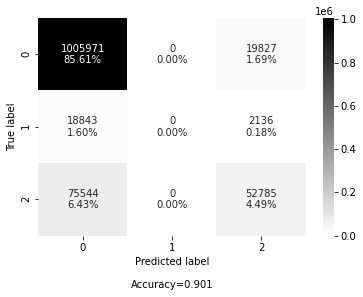

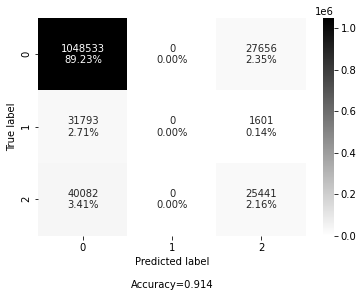

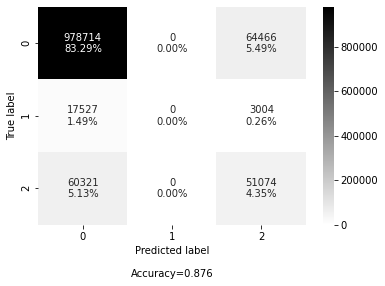

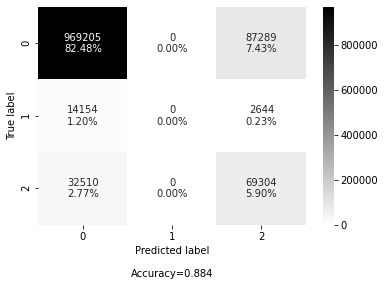

In [30]:
i=1
for trainindex,testindex in kf.split(X):
        models[i].fit(X.iloc[trainindex],Y.iloc[trainindex])
        prediction = models[i].predict(X.iloc[testindex])
        acc = accuracy_score(Y.iloc[testindex],prediction)
        print("Validation Accuracy with {} = {}".format(names[i],acc))
        model_tuples.append((names[i],models[i]))
        cf_matrix = confusion_matrix(Y.iloc[testindex],prediction)
        make_confusion_matrix(cf_matrix,cmap="binary")
        i+=1

###### Since the second Label "other" is not significant and it is not contributing in our training we will drop it

In [31]:
data = data[data['corona_result']!=1]
data['corona_result'].replace({2:1},inplace=True)
np.unique(data['corona_result'])

/home/noman/.local/lib/python3.8/site-packages/pandas/core/series.py:4575: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


array([0, 1], dtype=int64)

In [33]:
Y = data['corona_result']
X = data.drop(["corona_result"],axis=1)
labels = ["True Pos","False Pos","False Neg","True Neg"]
categories = ["Covid+", "Covid-"]

Validation Accuracy with MultinomialNB = 0.9173428480421045
Validation Accuracy with DecisionTreeClassifier = 0.9407402135601959
Validation Accuracy with RandomForestClassifier = 0.8914284226422955
Validation Accuracy with MLPClassifier = 0.9009225988994776


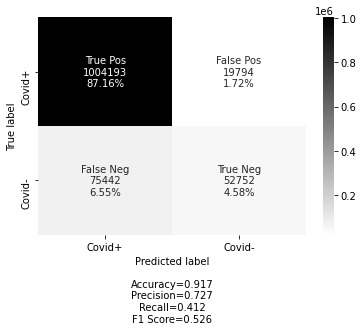

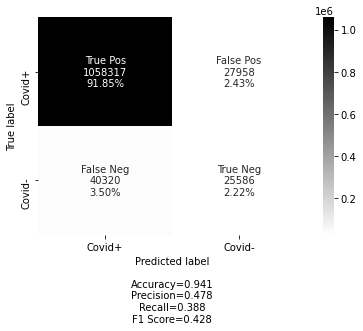

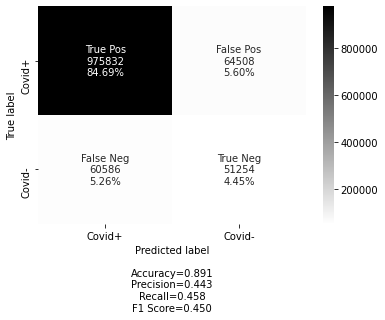

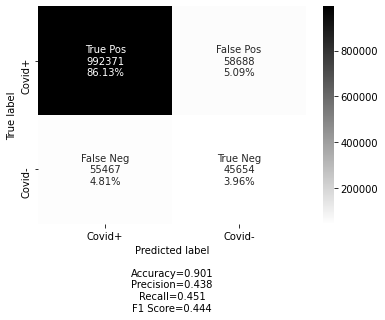

In [34]:
i=1
for trainindex,testindex in kf.split(X):
        models[i].fit(X.iloc[trainindex],Y.iloc[trainindex])
        prediction = models[i].predict(X.iloc[testindex])
        acc = accuracy_score(Y.iloc[testindex],prediction)
        print("Validation Accuracy with {} = {}".format(names[i],acc))
        model_tuples.append((names[i],models[i]))
        cf_matrix = confusion_matrix(Y.iloc[testindex],prediction)
        make_confusion_matrix(cf_matrix,group_names=labels,
                      categories=categories, 
                      cmap="binary")
        i+=1

In [39]:
model_tuples = [("MultinomialNB",MultinomialNB()),("DecisionTreeClassifier",DecisionTreeClassifier()),("RandomForestClassifier",RandomForestClassifier()),("MLPClassifier",MLPClassifier(hidden_layer_sizes=(32,64,128)))]

VC = VotingClassifier(estimators=model_tuples,n_jobs=-1)
scores = cross_val_score(VC, X, Y, cv=3)

In [40]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.91 accuracy with a standard deviation of 0.01


In [37]:
DT = DecisionTreeClassifier()
scores = cross_val_score(DT, X, Y, cv=10)

In [38]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.91 accuracy with a standard deviation of 0.01


In [42]:
VC.fit(X,Y)
DT.fit(X,Y)

DecisionTreeClassifier()

In [43]:
import pickle
pickle.dump(VC, open("EnsembleTrained", 'wb'))
pickle.dump(DT, open("DTTrained", 'wb'))